In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

colors = ["blue", "purple", "orange"]

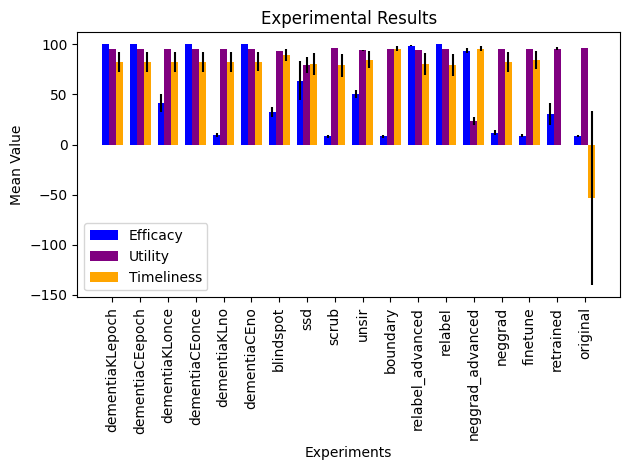

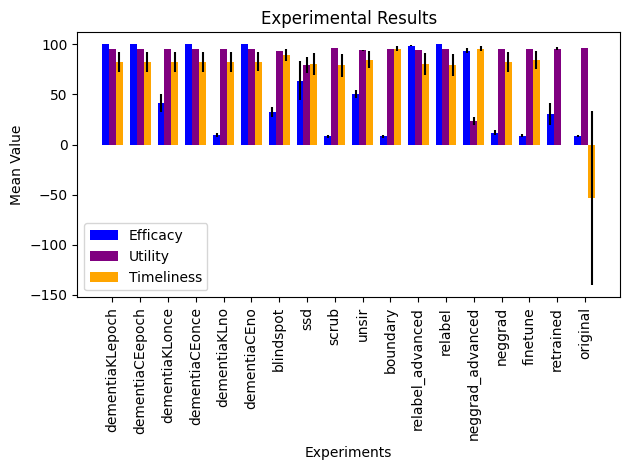

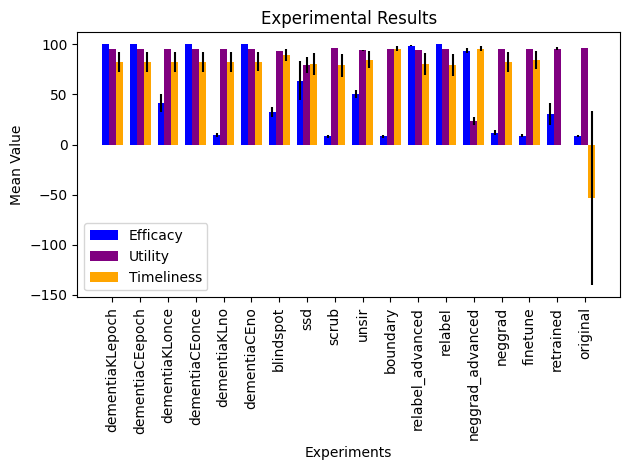

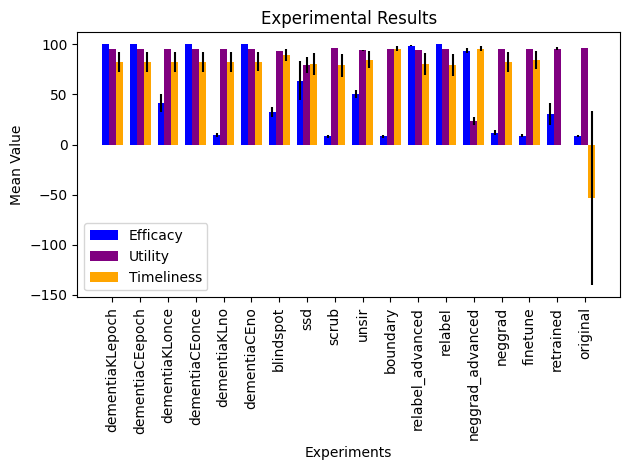

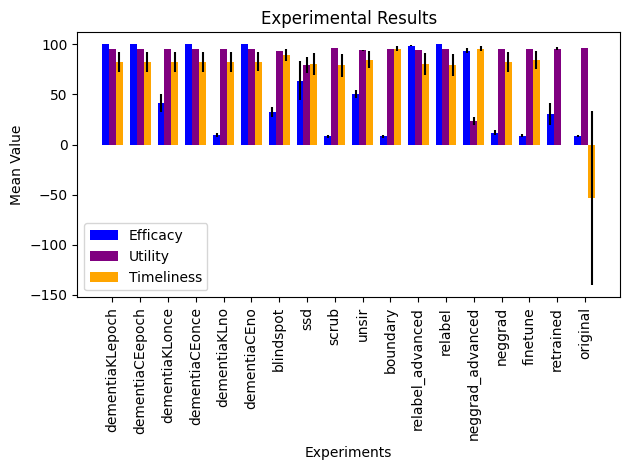

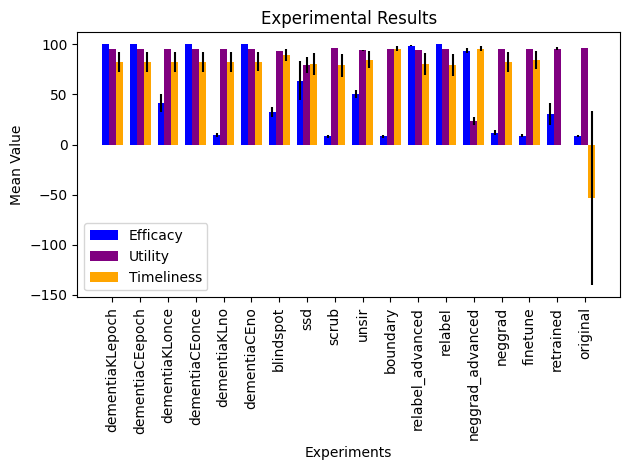

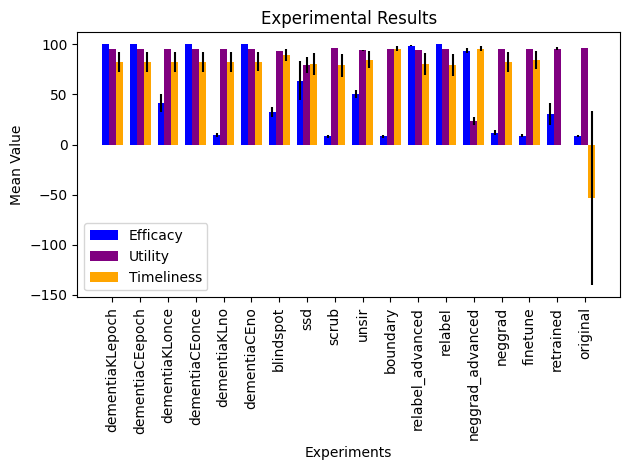

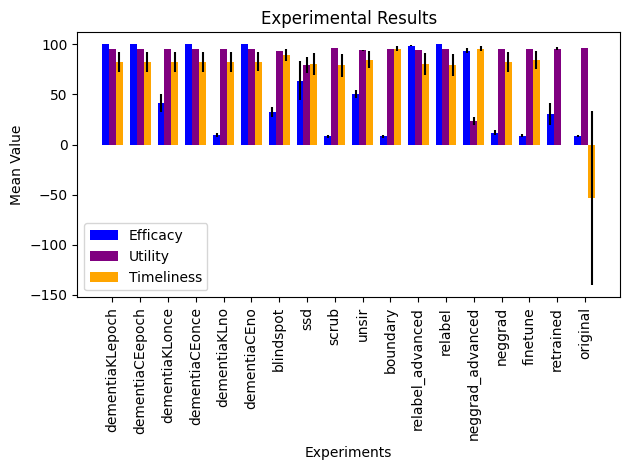

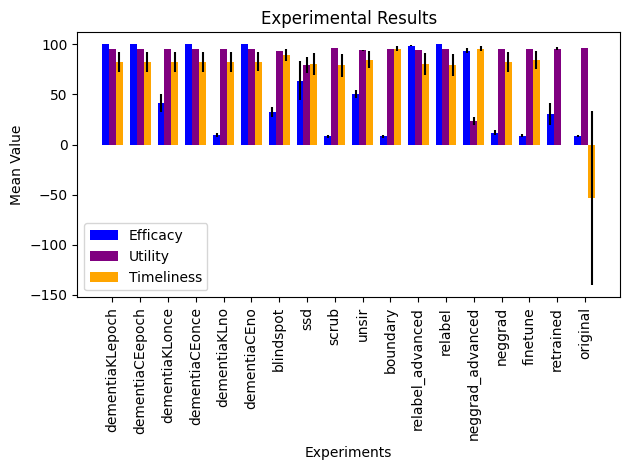

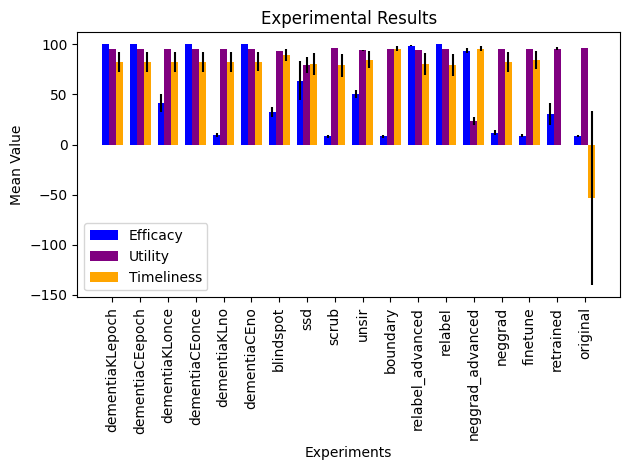

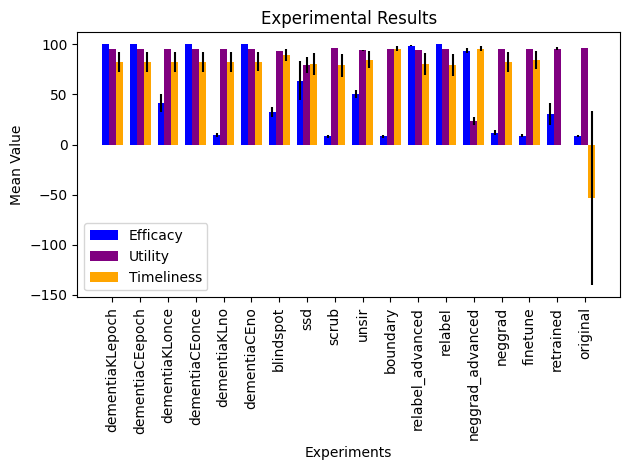

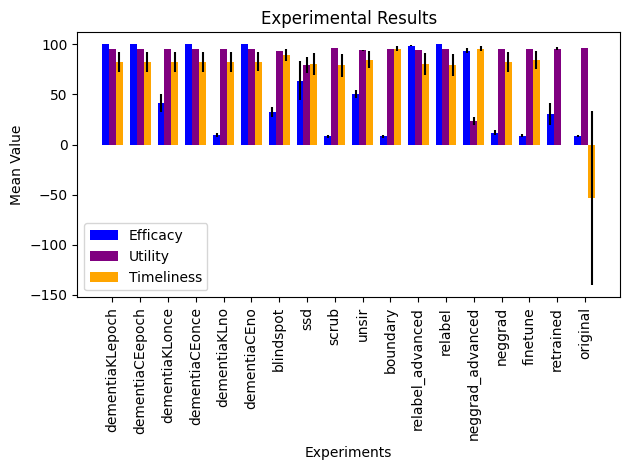

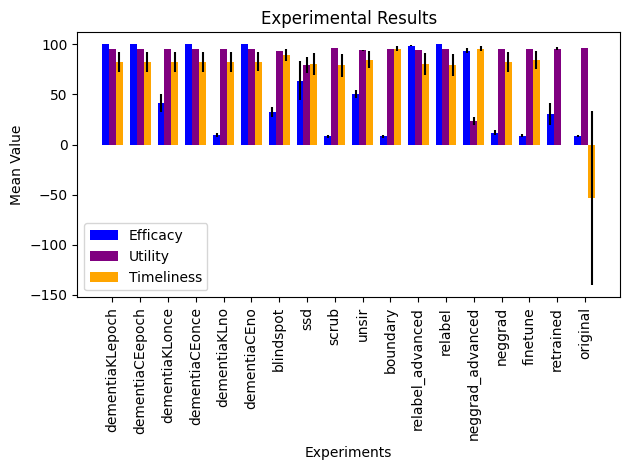

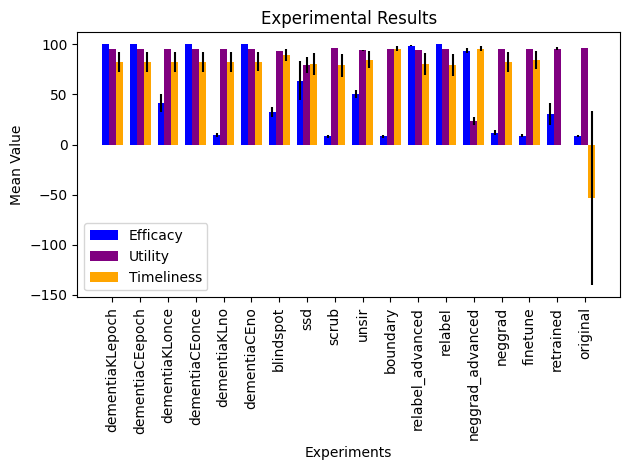

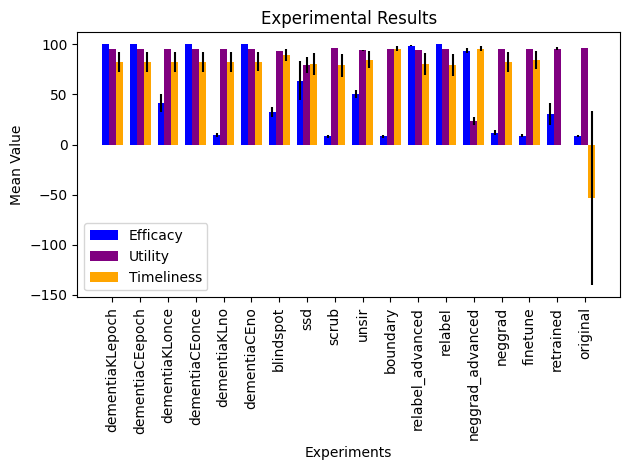

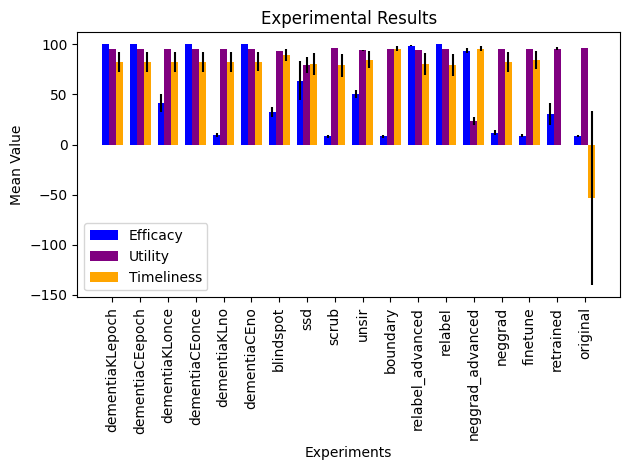

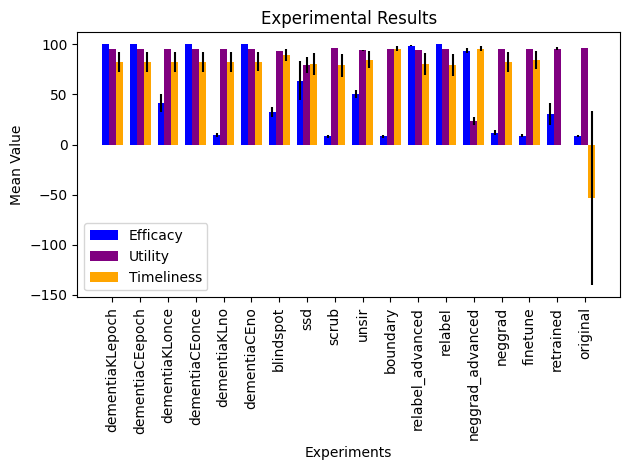

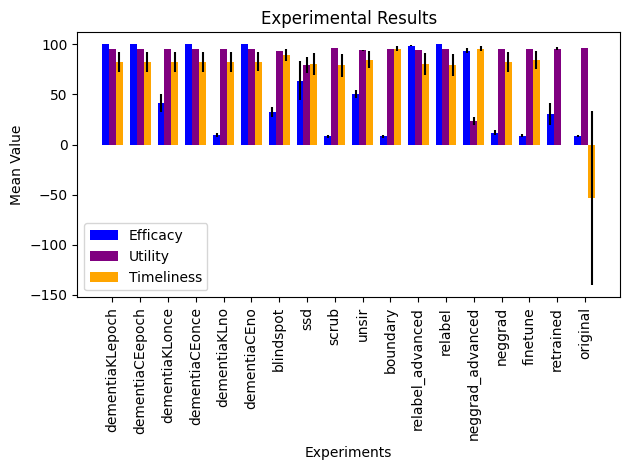

In [23]:
# resnet18 + cifar-10
excel_file = pd.ExcelFile('csv_results/resnet18-cifar10.xlsx')
df = pd.read_excel(excel_file, sheet_name='Plot')


experiments = df["Name"]
labels = ['Efficacy', 'Utility', 'Timeliness']
means = df[['EfficacyMean', 'UtilityMean', 'TimelinessMean']].values
stds = df[['EfficacyStd', 'UtilityStd', 'TimelinessStd']].values

num_experiments = len(experiments)
num_metrics = 3

bar_width = 0.25
group_width = bar_width * num_metrics

positions = np.arange(num_experiments) * (num_metrics + 1) * bar_width

fig, ax = plt.subplots()

for i in range(num_metrics):
    ax.bar(
        positions + i * bar_width,
        means[:, i],
        yerr=stds[:, i],
        width=bar_width,
        color=colors[i],
        label=['Efficacy', 'Utility', 'Timeliness'][i],
    )

# Add labels and title
ax.set_xlabel("Experiments")
ax.set_ylabel("Mean Value")
ax.set_title("Experimental Results")
ax.set_xticks(positions + (num_metrics - 1) * bar_width / 2)
ax.set_xticklabels(experiments)
ax.legend()

# Show or save the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()  # Show the plot

In [32]:
baselines = experiments[6:-1]
ablation = experiments[:6]
baselines


6            blindspot
7                  ssd
8                scrub
9                unsir
10            boundary
11    relabel_advanced
12             relabel
13    neggrad_advanced
14             neggrad
15            finetune
16           retrained
Name: Name, dtype: object